In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from itertools import permutations, combinations
import matplotlib as mpl
sns.set(color_codes=True)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['StudentsPerformance.csv']


In [75]:
student_per = pd.read_csv('../input/StudentsPerformance.csv')

In [76]:
#Reformatting the columns to make them pandas sytanx friendly
cols = student_per.columns
old_cols = student_per.columns
new_cols = [i.replace(' ', '_') for i in student_per.columns]
col_dict = {}
for i in range(len(cols)):
    col_dict[old_cols[i]] = new_cols[i]
col_dict

{'gender': 'gender',
 'race/ethnicity': 'race/ethnicity',
 'parental level of education': 'parental_level_of_education',
 'lunch': 'lunch',
 'test preparation course': 'test_preparation_course',
 'math score': 'math_score',
 'reading score': 'reading_score',
 'writing score': 'writing_score'}

In [77]:
student_per.rename(col_dict, axis=1, inplace=True)

In [78]:
#Creating a list containing the names of the columns that contain scores
math, reading, writing = student_per.math_score,student_per.reading_score,student_per.writing_score
scores = student_per.columns[-3:]
scores

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [80]:
#A simple built-in pandas method that returns the useful descriptie statistic for columns that contain numerical values
student_per.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<h2>Boxplot for reading, writing, math scores 

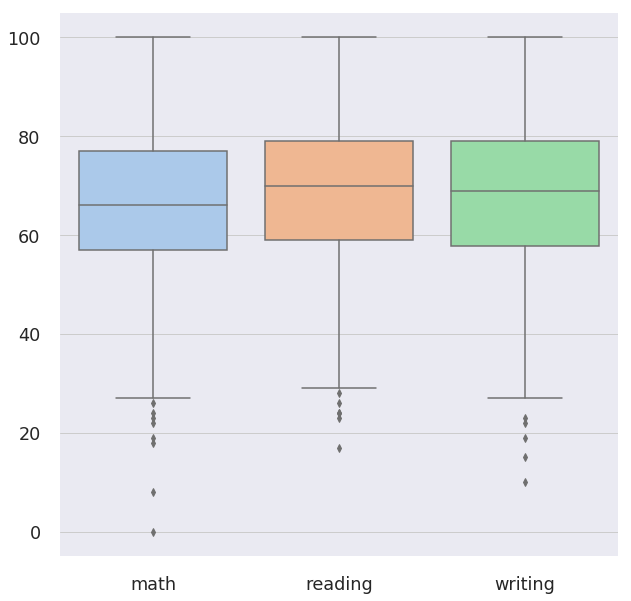

In [81]:
#Creating a boxplot to see the averages and deviations among scores. Averages don't seem too far off!
fig,ax = plt.subplots(1,1, figsize=(10,10))
sns.set(style="ticks", palette="pastel", font_scale=1.6)
sns.boxplot(x=['math','reading' ,'writing'],
    y=[math, reading,student_per.writing_score])
sns.despine(offset=10, trim=True)

<h2>Mean of sample means for scores

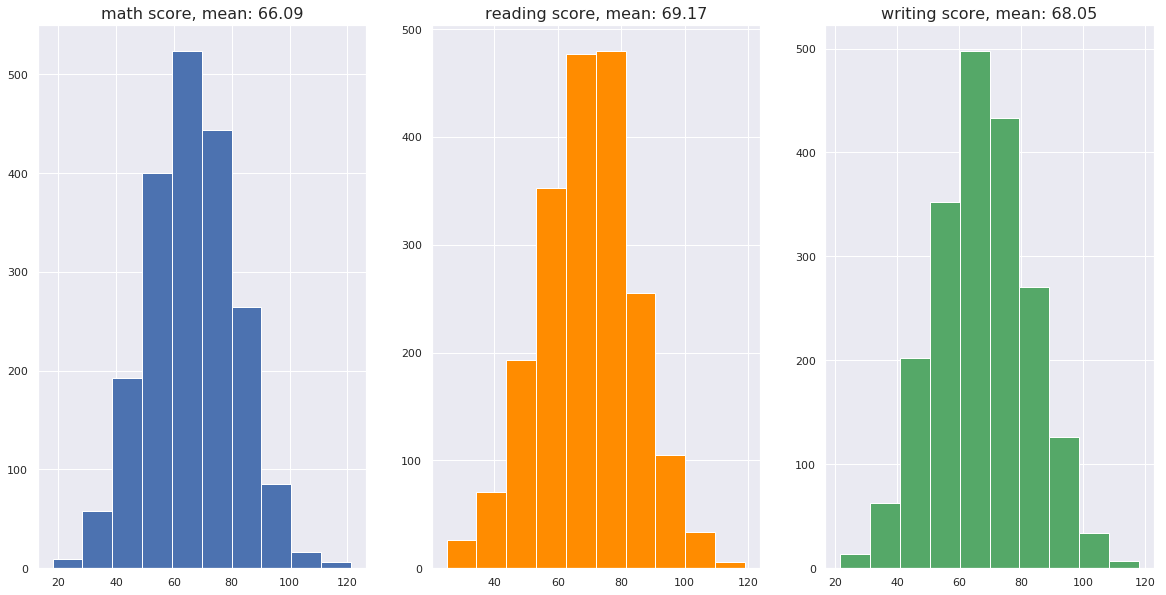

In [82]:
#Getting the normal distribution of the scores, using random SAMPLING. This is not how the data looks raw.
sns.set(color_codes=True)
fig,axes = plt.subplots(1,3,figsize=(20,10))
#s = np.random.normal(mu, sigma, 2000)
colors = ['b','darkorange','g']
for test_score, ax, i in zip(scores,axes, range(3)):
    mu, sigma = student_per[test_score].mean(), student_per[test_score].std()
    s = np.random.normal(mu, sigma, 2000)
    ax.hist(s, color=colors[i])
    ax.set_title(test_score.replace('_',' ')+", mean: {}".format(round(mu,2)), size=16)
    ax.grid(True)

<h3> Visualizing the relationship, if any, that a parent's schooling may have on their kid's test scores</h3>
- Although there seems to be an improvement when factoring parent's education, the increase is relatively miniscule.

In [ ]:
#plotting scores on a scatter
fig, axes = plt.subplots(1,3, figsize=(25,6))
#sns.scatterplot(reading, math);
ax1, ax2, ax3 = axes
ax1.scatter(writing, math,edgecolors='black')
ax2.scatter(reading, writing,edgecolors='black')
ax3.scatter(reading, math, edgecolors='black')
for ax in axes:
    ax.grid(True)
ax1.set_xlabel('Writing');
ax1.set_ylabel('Math');
ax2.set_xlabel('Reading');
ax2.set_ylabel('Writing');
ax3.set_xlabel('Reading');
ax3.set_ylabel('Math');


In [ ]:

sns.set(color_codes=True)
parent_level_score = (student_per.groupby('parental_level_of_education')[['writing_score','math_score','reading_score']].mean()).sort_values(by='writing_score')
fig, ax = plt.subplots(1,1,figsize=(16,8))
width = .25
x = np.arange(6)
read = ax.bar(x-width, height=parent_level_score.reading_score, width=width, bottom=0)
write = ax.bar(x, height=parent_level_score.writing_score, width=width,)
mat = ax.bar(x+width, height=parent_level_score.math_score, width=width,)
ind = list(parent_level_score.index)
ind.insert(0,'a')
ax.set_xticklabels(ind, size=13);
ax.legend(['reading','writing','math'], loc='best', fontsize='large');
ax.set_title('Averages for Scores ',size=15);
# for bar, num in zip(read,x):
#     #print(bar.get_height())
#     print(num-width)
#     ax.text(num-width, y=round(bar.get_height())+2, s=round(bar.get_height()))

In [ ]:
#Does completing the test preparation course boost actual scores?
scores = ['reading_score','writing_score','math_score']
for score in scores:
    print(student_per.groupby('test_preparation_course')[score].mean())
    print('for {}\n'.format(score))
test = student_per.groupby('test_preparation_course')[scores].mean()

<h3>The code above shows that completing the test preparation course is related to an increase in the average score in all three test. <br> From what we can see in the pie chart below, males and females have an almost identical completion rate when it comes to the test preparation course.</h3>

In [ ]:
mpl.rcParams["font.size"] = 15
fig, axes = plt.subplots(1,2, figsize=(20,15))
ax1, ax2 = axes
test_prep_gender = student_per.groupby('gender').test_preparation_course.value_counts(normalize=True)
female, male = test_prep_gender['female'], test_prep_gender['male']
ax1.pie(female, labels=['none','completed'], autopct='%1.1f%%', textprops={'size':15});
ax1.set_title('Female Test Prep', size=17)
ax2.set_title('Male Test Prep', size=17)
ax2.pie(male, labels=['none','completed'], autopct='%1.1f%%', colors=['r','g'],textprops={'size':15});

<h3>After acknowledging that the preparation tests are completed at the *same* rate between genders, females test higher on average in reading and writing, while males score higher in math

In [ ]:
student_per.groupby('gender')[scores].mean()


In [ ]:
student_per.groupby('lunch')[scores].mean()

<h3>The table below shows the average scores for students that have completed test prep and haven't and includes their lunch status.</h3>
-  Students in this dataset can either have <b>standard or free/reduced lunch</b>
-  Free or reduced lunch is generally provided as an assistance for families that are not financially resourceful
-  Kids who were provided free lunch  <b>**underperformed**</b> on average compared to their 'standard' counterparts


In [ ]:
(student_per.groupby(['test_preparation_course','lunch'])['reading_score','writing_score','math_score'].mean())


In [ ]:
student_per.groupby(['lunch','gender'])[scores].mean()


<h3>The graph below shows that relationship between the highest level of education the parents completed and the rate of standard and free/reduced lunch</h3>
- Although there are deviations, the trends are notably similar

In [ ]:
plt.figure(figsize=(12,12))
(student_per.groupby('parental_level_of_education').lunch.value_counts(normalize=True)).plot(kind='bar');


<h3>Score differences between different races and ethnicities, however this dataset does not define any of the groups.

In [ ]:
student_per.groupby('race/ethnicity')[scores].mean()

<h2>Grouping students by their exam scores

In [ ]:
#creating buckets to categorize the scores by letter grade
bucket = [0,60,70,80,90,101]
bucket_grade = ['F','D','C','B','A']

In [ ]:
#Creating three additionals columns containing letter grades for the corresponding scores
student_per['math_grade'] = pd.cut(math,bins=bucket, labels=bucket_grade);
student_per['reading_grade'] = pd.cut(reading,bins=bucket, labels=bucket_grade);
student_per['writing_grade'] = pd.cut(writing,bins=bucket, labels=bucket_grade);


<h3>20% of all students in this dataset failed all three tests

In [ ]:
failed_all_exams = (student_per[(student_per.math_grade=='F')&(student_per.writing_grade=='F')&(student_per.reading_grade=='F')])
len(failed_all_exams)

<h3>42% of all students failed at least one exam, half of these students are made up of students who failed all the exams

In [ ]:
failed_one_exam = (student_per[(student_per.math_grade=='F')|(student_per.writing_grade=='F')|(student_per.reading_grade=='F')])
len(failed_one_exam)
#failed_all_exams

<h3>Only 23 out of 1000 students passed all exams with an A

In [ ]:
aced_all_exams = (student_per[(student_per.math_grade=='A')&(student_per.writing_grade=='A')&(student_per.reading_grade=='A')])
len(aced_all_exams)

<h3>60% of all students in this dataset passed at least on exam with a score of 70 or higher.

In [ ]:
passed_one = (student_per[(student_per.math_score>=70)|(student_per.writing_score>=70)|(student_per.reading_score>=70)])
len(passed_one)

<h3>How different are students who pass all their exams from students who contrarily fail them all?

86% of students who aced all the exams had standard lunch, while 58% of students who failed all the exams had reduced/free lunch

In [ ]:
print(aced_all_exams.lunch.value_counts(normalize=True))
failed_all_exams.lunch.value_counts(normalize=True)

This output shows the relationship a parents level of education can have on their kid's exams scores.

In [ ]:
print(aced_all_exams.parental_level_of_education.value_counts(normalize=True))
failed_all_exams.parental_level_of_education.value_counts(normalize=True)

Lastly, completing the test prep held true as it yielded higher **(60.86%)** when observing students who passed all their exams,<br> and much lower when observing students who failed all the exams **(21.46)**

In [ ]:
print(aced_all_exams.test_preparation_course.value_counts(normalize=True))
failed_all_exams.test_preparation_course.value_counts(normalize=True)

In [ ]:
#Althogh there is some notable differences in the output here. Not knowing the groups for race/ethnicity makes his information hard to use.
# print(aced_all_exams['race/ethnicity'].value_counts(normalize=True))
# failed_all_exams['race/ethnicity'].value_counts(normalize=True)

<h3>Conclusion</h3>
<font size=4>This dataset contained 1000 rows of data and 8 columns. I searched and visualized any relationships any of the columns may have had on the math scores, writing scores, and reading scores. This dataset contains qualitative columns gender, race/ethnicity, parental level of education, lunch (whether free/reduced or not), and test preparation course (whether completed or not). <br><br> From the visualizations presented in this document, relationships between the completion of test preparation and scores across the board (math, reading, writing) can be observed. There is an observable relationship when measuring gender, where females get better scores on average in both reading and writing but not in math. The last relationship that can be noted from this dataset is that of lunch status. Students who had assistance (free/reduced) on average scored lower across the all three test when compared to students who paid standard price.
